In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
# Install the Ultralytics package which includes YOLOv8
!pip install ultralytics -q

# Import necessary libraries
import os
import yaml
from ultralytics import YOLO
from IPython.display import Image

In [1]:
# Install the Ultralytics package
!pip install ultralytics -q

# Import necessary libraries
import os
import yaml
from ultralytics import YOLO
from IPython.display import Image

# Define the dataset configuration
# NOTE: Ensure this path matches your Kaggle dataset's location
dataset_path = '/kaggle/input/hackforindia/HackByte_Dataset'

yolo_config = {
    'train': os.path.join(dataset_path, 'data/train/images'),
    'val': os.path.join(dataset_path, 'data/val/images'),
    'test': os.path.join(dataset_path, 'data/test/images'),
    'nc': 3,
    'names': ['FireExtinguisher', 'ToolBox', 'OxygenTank']
}

# Write the configuration to a YAML file
with open('yolo_params.yaml', 'w') as file:
    yaml.dump(yolo_config, file, default_flow_style=False)

print("✅ yolo_params.yaml created successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.9 MB/s eta 0:00:0000:0100:01
Creating new Ultralyt

In [2]:
# Load a pretrained YOLOv8 model (e.g., 'yolov8s.pt')
model = YOLO('yolov8s.pt')

# Train the model to establish a baseline [cite: 351]
baseline_results = model.train(
    data='yolo_params.yaml',
    epochs=100,
    project='detection_runs',
    name='baseline_run',
    imgsz=640
)

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_params.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=baseline_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 66.2±20.2 MB/s, size: 2900.0 KB)


train: Scanning /kaggle/input/hackforindia/HackByte_Dataset/data/train/labels... 846 images, 5 backgrounds, 0 corrupt: 100%|██████████| 846/846 [00:13<00:00, 62.67it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/hackforindia/HackByte_Dataset/data/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 105.5±11.5 MB/s, size: 3015.9 KB)


val: Scanning /kaggle/input/hackforindia/HackByte_Dataset/data/val/labels... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:02<00:00, 63.06it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/hackforindia/HackByte_Dataset/data/val is not writeable, cache not saved.


Plotting labels to detection_runs/baseline_run/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to detection_runs/baseline_run
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.69G     0.9517      2.049      1.146         28        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        154        206      0.885      0.783       0.83      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.91G     0.9449      1.161      1.106         49        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.10it/s]

                   all        154        206      0.599      0.559      0.671      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.94G      1.041      1.137      1.159         45        640: 100%|██████████| 53/53 [00:32<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.98it/s]

                   all        154        206      0.422      0.594      0.514      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.98G      1.019      1.085      1.158         30        640: 100%|██████████| 53/53 [00:33<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.06it/s]

                   all        154        206      0.766      0.616      0.702      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.02G      1.018      1.019      1.144         33        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        154        206       0.71      0.605       0.71      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.05G     0.9325     0.8928      1.107         39        640: 100%|██████████| 53/53 [00:33<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]

                   all        154        206      0.812       0.73      0.823      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.09G     0.9353     0.9189      1.105         37        640: 100%|██████████| 53/53 [00:32<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        154        206      0.928      0.809      0.884      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.13G     0.9333     0.8541      1.094         28        640: 100%|██████████| 53/53 [00:32<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        154        206      0.887      0.743      0.813      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.16G     0.8564      0.776      1.064         24        640: 100%|██████████| 53/53 [00:31<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]

                   all        154        206      0.928      0.804      0.876      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       4.2G     0.8873     0.8073      1.091         24        640: 100%|██████████| 53/53 [00:32<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all        154        206      0.907      0.806      0.864      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.23G     0.8095     0.7484      1.039         31        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        154        206      0.961      0.792      0.886      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.27G     0.8581     0.7549      1.069         40        640: 100%|██████████| 53/53 [00:32<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        154        206      0.956      0.779      0.871      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.31G     0.7725     0.6683      1.015         38        640: 100%|██████████| 53/53 [00:32<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]

                   all        154        206      0.887      0.799      0.876      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.34G     0.7772     0.6644      1.017         33        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.04it/s]

                   all        154        206      0.979      0.837      0.909      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.38G     0.7811     0.6913      1.026         36        640: 100%|██████████| 53/53 [00:33<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]

                   all        154        206      0.914      0.805      0.882      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.42G     0.7465     0.6366      1.016         24        640: 100%|██████████| 53/53 [00:32<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]

                   all        154        206      0.938      0.827      0.887      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.45G      0.772     0.6548      1.012         29        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        154        206      0.933      0.829      0.906      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.49G     0.7216     0.6259      1.001         40        640: 100%|██████████| 53/53 [00:32<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        154        206      0.946      0.793      0.872      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.56G     0.7222     0.6145      1.007         32        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        154        206      0.963      0.815      0.903      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.63G     0.7378     0.6534      1.014         40        640: 100%|██████████| 53/53 [00:33<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        154        206      0.929      0.842      0.898       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.66G     0.7118     0.6224     0.9911         47        640: 100%|██████████| 53/53 [00:32<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        154        206      0.961      0.869      0.913      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.73G     0.6888     0.5968     0.9924         40        640: 100%|██████████| 53/53 [00:32<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        154        206      0.936      0.876      0.915      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       4.8G     0.7122     0.5905     0.9962         34        640: 100%|██████████| 53/53 [00:33<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]

                   all        154        206       0.96      0.838      0.904      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.87G     0.6682     0.5697     0.9813         34        640: 100%|██████████| 53/53 [00:32<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        154        206      0.912      0.797      0.865      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.94G     0.6747     0.5707     0.9816         35        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        154        206      0.956      0.841      0.912      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.98G     0.6407     0.5373     0.9648         48        640: 100%|██████████| 53/53 [00:33<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]

                   all        154        206      0.966      0.832      0.907      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.05G     0.6414     0.5218     0.9643         40        640: 100%|██████████| 53/53 [00:33<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        154        206      0.917      0.883      0.909      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.12G     0.6369     0.5109     0.9611         25        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all        154        206      0.943      0.848      0.916      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.19G     0.6402     0.4972     0.9603         43        640: 100%|██████████| 53/53 [00:34<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        154        206      0.981      0.841      0.926      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.22G     0.6148     0.5164     0.9637         25        640: 100%|██████████| 53/53 [00:32<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        154        206      0.934      0.864      0.919      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.33G     0.6132     0.5044     0.9483         40        640: 100%|██████████| 53/53 [00:32<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        154        206      0.988      0.859      0.926      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.36G     0.6331     0.5215     0.9612         38        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        154        206      0.954      0.861      0.921      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.43G     0.6312     0.5023     0.9556         29        640: 100%|██████████| 53/53 [00:32<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

                   all        154        206      0.959      0.866      0.926      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       5.5G     0.6136     0.4871     0.9472         36        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        154        206      0.971      0.879      0.919      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.61G     0.6143     0.4978     0.9496         39        640: 100%|██████████| 53/53 [00:33<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        154        206      0.973      0.868      0.926      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.64G     0.6052     0.4831     0.9431         46        640: 100%|██████████| 53/53 [00:32<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        154        206      0.938      0.874      0.922      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.71G     0.6039     0.4875     0.9486         33        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]

                   all        154        206      0.979      0.872      0.933      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.75G     0.5969     0.4742     0.9447         28        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.98it/s]

                   all        154        206      0.943      0.889      0.924      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.85G     0.5737     0.4771     0.9253         34        640: 100%|██████████| 53/53 [00:33<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        154        206      0.996       0.86      0.923      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.89G     0.5722     0.4503     0.9349         28        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        154        206      0.975      0.885      0.923      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.96G     0.5584     0.4476      0.927         47        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        154        206      0.963      0.888      0.923       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.02G      0.568     0.4446     0.9313         29        640: 100%|██████████| 53/53 [00:33<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]

                   all        154        206      0.971      0.873      0.923       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       6.1G     0.5537     0.4364     0.9263         34        640: 100%|██████████| 53/53 [00:34<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.12it/s]

                   all        154        206      0.948      0.889      0.927      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.13G     0.5781     0.4495     0.9382         39        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        154        206      0.973      0.862      0.911       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       6.2G     0.5723     0.4539     0.9299         36        640: 100%|██████████| 53/53 [00:32<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        154        206      0.954       0.89      0.932      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.27G     0.5614     0.4453     0.9322         29        640: 100%|██████████| 53/53 [00:32<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        154        206       0.96      0.882      0.926      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.34G     0.5519      0.433     0.9184         34        640: 100%|██████████| 53/53 [00:32<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        154        206      0.974      0.903      0.936      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.41G     0.5434     0.4282     0.9167         33        640: 100%|██████████| 53/53 [00:32<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        154        206      0.931      0.883       0.93      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.48G     0.5438     0.4279      0.921         36        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        154        206       0.96      0.895      0.925      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.51G     0.5166     0.4176     0.9129         34        640: 100%|██████████| 53/53 [00:32<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]

                   all        154        206      0.971      0.893      0.933      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.62G     0.5224      0.413     0.9049         38        640: 100%|██████████| 53/53 [00:33<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        154        206      0.916      0.859      0.913      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.65G     0.5324     0.4145     0.9061         42        640: 100%|██████████| 53/53 [00:32<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]

                   all        154        206      0.964      0.901      0.938      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.72G     0.5259     0.4075     0.9118         38        640: 100%|██████████| 53/53 [00:33<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.19it/s]

                   all        154        206      0.981      0.896      0.936      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.79G     0.5072     0.3885     0.9024         42        640: 100%|██████████| 53/53 [00:33<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]

                   all        154        206       0.97        0.9      0.933      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.86G     0.5026     0.3777     0.9008         32        640: 100%|██████████| 53/53 [00:31<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        154        206      0.969      0.892      0.936      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.93G     0.5023     0.3856     0.9021         39        640: 100%|██████████| 53/53 [00:32<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]

                   all        154        206      0.957      0.898      0.934      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.97G     0.4996     0.3913     0.8992         42        640: 100%|██████████| 53/53 [00:33<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]

                   all        154        206       0.97      0.893      0.941      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.04G     0.5008     0.3886     0.9014         44        640: 100%|██████████| 53/53 [00:32<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        154        206      0.959      0.898       0.95      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.14G     0.4831     0.3915     0.8937         37        640: 100%|██████████| 53/53 [00:32<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        154        206      0.965      0.886      0.935      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.18G     0.4829     0.3703     0.9011         49        640: 100%|██████████| 53/53 [00:32<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        154        206      0.991      0.882       0.94      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.25G     0.5099     0.3908     0.9054         33        640: 100%|██████████| 53/53 [00:32<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        154        206       0.97      0.891      0.936       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.32G     0.4792     0.3594     0.8949         43        640: 100%|██████████| 53/53 [00:32<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all        154        206      0.971      0.911      0.938       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.39G     0.4912     0.3797     0.9036         34        640: 100%|██████████| 53/53 [00:32<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        154        206      0.981      0.893       0.93      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         4G     0.4881     0.3751     0.8971         40        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        154        206      0.987      0.896      0.943      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         4G     0.4728     0.3627     0.9041         32        640: 100%|██████████| 53/53 [00:33<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]

                   all        154        206      0.989        0.9      0.938      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         4G     0.4663     0.3584     0.8894         29        640: 100%|██████████| 53/53 [00:33<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        154        206      0.976      0.891      0.934       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         4G      0.457     0.3517     0.8883         34        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        154        206      0.978      0.886      0.936      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         4G     0.4605     0.3491     0.8938         39        640: 100%|██████████| 53/53 [00:32<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        154        206      0.993      0.869      0.942      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         4G     0.4671     0.3597     0.8959         44        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all        154        206      0.995      0.899      0.936      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.03G      0.453     0.3537     0.8873         35        640: 100%|██████████| 53/53 [00:32<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.12it/s]

                   all        154        206      0.983      0.903      0.942      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.07G     0.4393     0.3378     0.8832         44        640: 100%|██████████| 53/53 [00:32<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]

                   all        154        206      0.988       0.91      0.944      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.11G     0.4501     0.3383     0.8814         46        640: 100%|██████████| 53/53 [00:33<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        154        206      0.983      0.907      0.944      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.14G     0.4353     0.3268     0.8765         39        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]

                   all        154        206      0.968      0.909      0.945      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.18G     0.4486     0.3398     0.8902         46        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]

                   all        154        206      0.984      0.907      0.943      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.21G     0.4275      0.338     0.8813         31        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        154        206      0.982      0.903      0.939      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.25G     0.4182      0.321     0.8748         41        640: 100%|██████████| 53/53 [00:34<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        154        206      0.993       0.91      0.947      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.29G      0.424     0.3197     0.8822         32        640: 100%|██████████| 53/53 [00:32<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        154        206      0.968      0.904      0.943      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.32G     0.4264     0.3306     0.8858         37        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        154        206      0.987      0.907      0.945      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.43G     0.4245     0.3272     0.8762         57        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        154        206      0.986        0.9       0.94      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.46G      0.408     0.3134     0.8694         42        640: 100%|██████████| 53/53 [00:32<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        154        206      0.983      0.908      0.944      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.53G     0.4155     0.3168     0.8728         41        640: 100%|██████████| 53/53 [00:32<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]

                   all        154        206      0.975      0.909      0.946      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.57G     0.4078      0.306     0.8779         36        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all        154        206      0.991      0.908      0.949      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.67G     0.4162     0.3172     0.8805         40        640: 100%|██████████| 53/53 [00:32<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]

                   all        154        206      0.978      0.907      0.949      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.71G     0.3956     0.3034     0.8645         31        640: 100%|██████████| 53/53 [00:33<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]

                   all        154        206       0.98      0.909      0.946      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.78G     0.4016      0.307     0.8689         38        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all        154        206      0.977      0.916      0.944      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.85G      0.393     0.2954     0.8657         43        640: 100%|██████████| 53/53 [00:33<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]

                   all        154        206       0.98       0.91      0.945      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.95G     0.3864     0.2856     0.8599         36        640: 100%|██████████| 53/53 [00:33<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]

                   all        154        206      0.976      0.914      0.948      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.99G     0.3882     0.2957     0.8642         33        640: 100%|██████████| 53/53 [00:33<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        154        206      0.979      0.914      0.951      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.06G     0.3944     0.2998     0.8704         41        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        154        206      0.983      0.903      0.947       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.09G     0.3844     0.2843     0.8765         30        640: 100%|██████████| 53/53 [00:33<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.98it/s]

                   all        154        206      0.981      0.909      0.945      0.894


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       5.2G     0.2936      0.225     0.7953         21        640: 100%|██████████| 53/53 [00:35<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]

                   all        154        206      0.983      0.909      0.949      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.23G     0.2964      0.229     0.8006         20        640: 100%|██████████| 53/53 [00:33<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all        154        206      0.992      0.917      0.944      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       5.3G     0.2819     0.2284     0.7937         15        640: 100%|██████████| 53/53 [00:32<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        154        206      0.983      0.916      0.942      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.37G     0.2807     0.2141      0.788         18        640: 100%|██████████| 53/53 [00:32<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]

                   all        154        206      0.969      0.921      0.945      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.44G     0.2696     0.2089     0.7938         20        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        154        206      0.981      0.907      0.943      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.51G     0.2706     0.2136     0.7894         20        640: 100%|██████████| 53/53 [00:33<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        154        206      0.976      0.905      0.944      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.54G     0.2671     0.2083     0.7983         20        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.06it/s]

                   all        154        206      0.997      0.902      0.945      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.62G     0.2616      0.205      0.791         20        640: 100%|██████████| 53/53 [00:34<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.98it/s]

                   all        154        206      0.996        0.9      0.947      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.72G      0.256     0.1958     0.7818         19        640: 100%|██████████| 53/53 [00:32<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        154        206      0.977      0.914      0.948        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.75G     0.2574      0.199     0.7911         17        640: 100%|██████████| 53/53 [00:33<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        154        206      0.976      0.919      0.946      0.898



100 epochs completed in 1.010 hours.
Optimizer stripped from detection_runs/baseline_run/weights/last.pt, 22.5MB
Optimizer stripped from detection_runs/baseline_run/weights/best.pt, 22.5MB

Validating detection_runs/baseline_run/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        154        206      0.977      0.915      0.948        0.9
      FireExtinguisher         67         67      0.986       0.94      0.968      0.927
               ToolBox         60         60      0.972        0.9      0.934      0.919
            OxygenTank         79         79      0.973      0.903      0.941      0.854
Speed: 0.1ms preprocess, 2.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to detection_runs/baseline_run


In [3]:
# Load the best model from the baseline training run
model = YOLO('detection_runs/baseline_run/weights/best.pt')

# Evaluate the model's performance on the test set
metrics = model.val(
    data='yolo_params.yaml',
    split='test',
    project='detection_runs',
    name='baseline_evaluation'
)

print(f"Baseline mAP@0.5: {metrics.box.map50}")

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 81.3±24.0 MB/s, size: 2990.3 KB)


val: Scanning /kaggle/input/hackforindia/HackByte_Dataset/data/test/labels... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:07<00:00, 55.60it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/hackforindia/HackByte_Dataset/data/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:14<00:00,  1.71it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        400        560      0.913      0.805      0.877      0.785
      FireExtinguisher        183        183      0.895      0.842      0.881      0.767
               ToolBox        193        193      0.939      0.791      0.876      0.811
            OxygenTank        184        184      0.906      0.783      0.875      0.777
Speed: 0.4ms preprocess, 5.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to detection_runs/baseline_evaluation
Baseline mAP@0.5: 0.8770800989901223


Training and Validation Loss Curves:


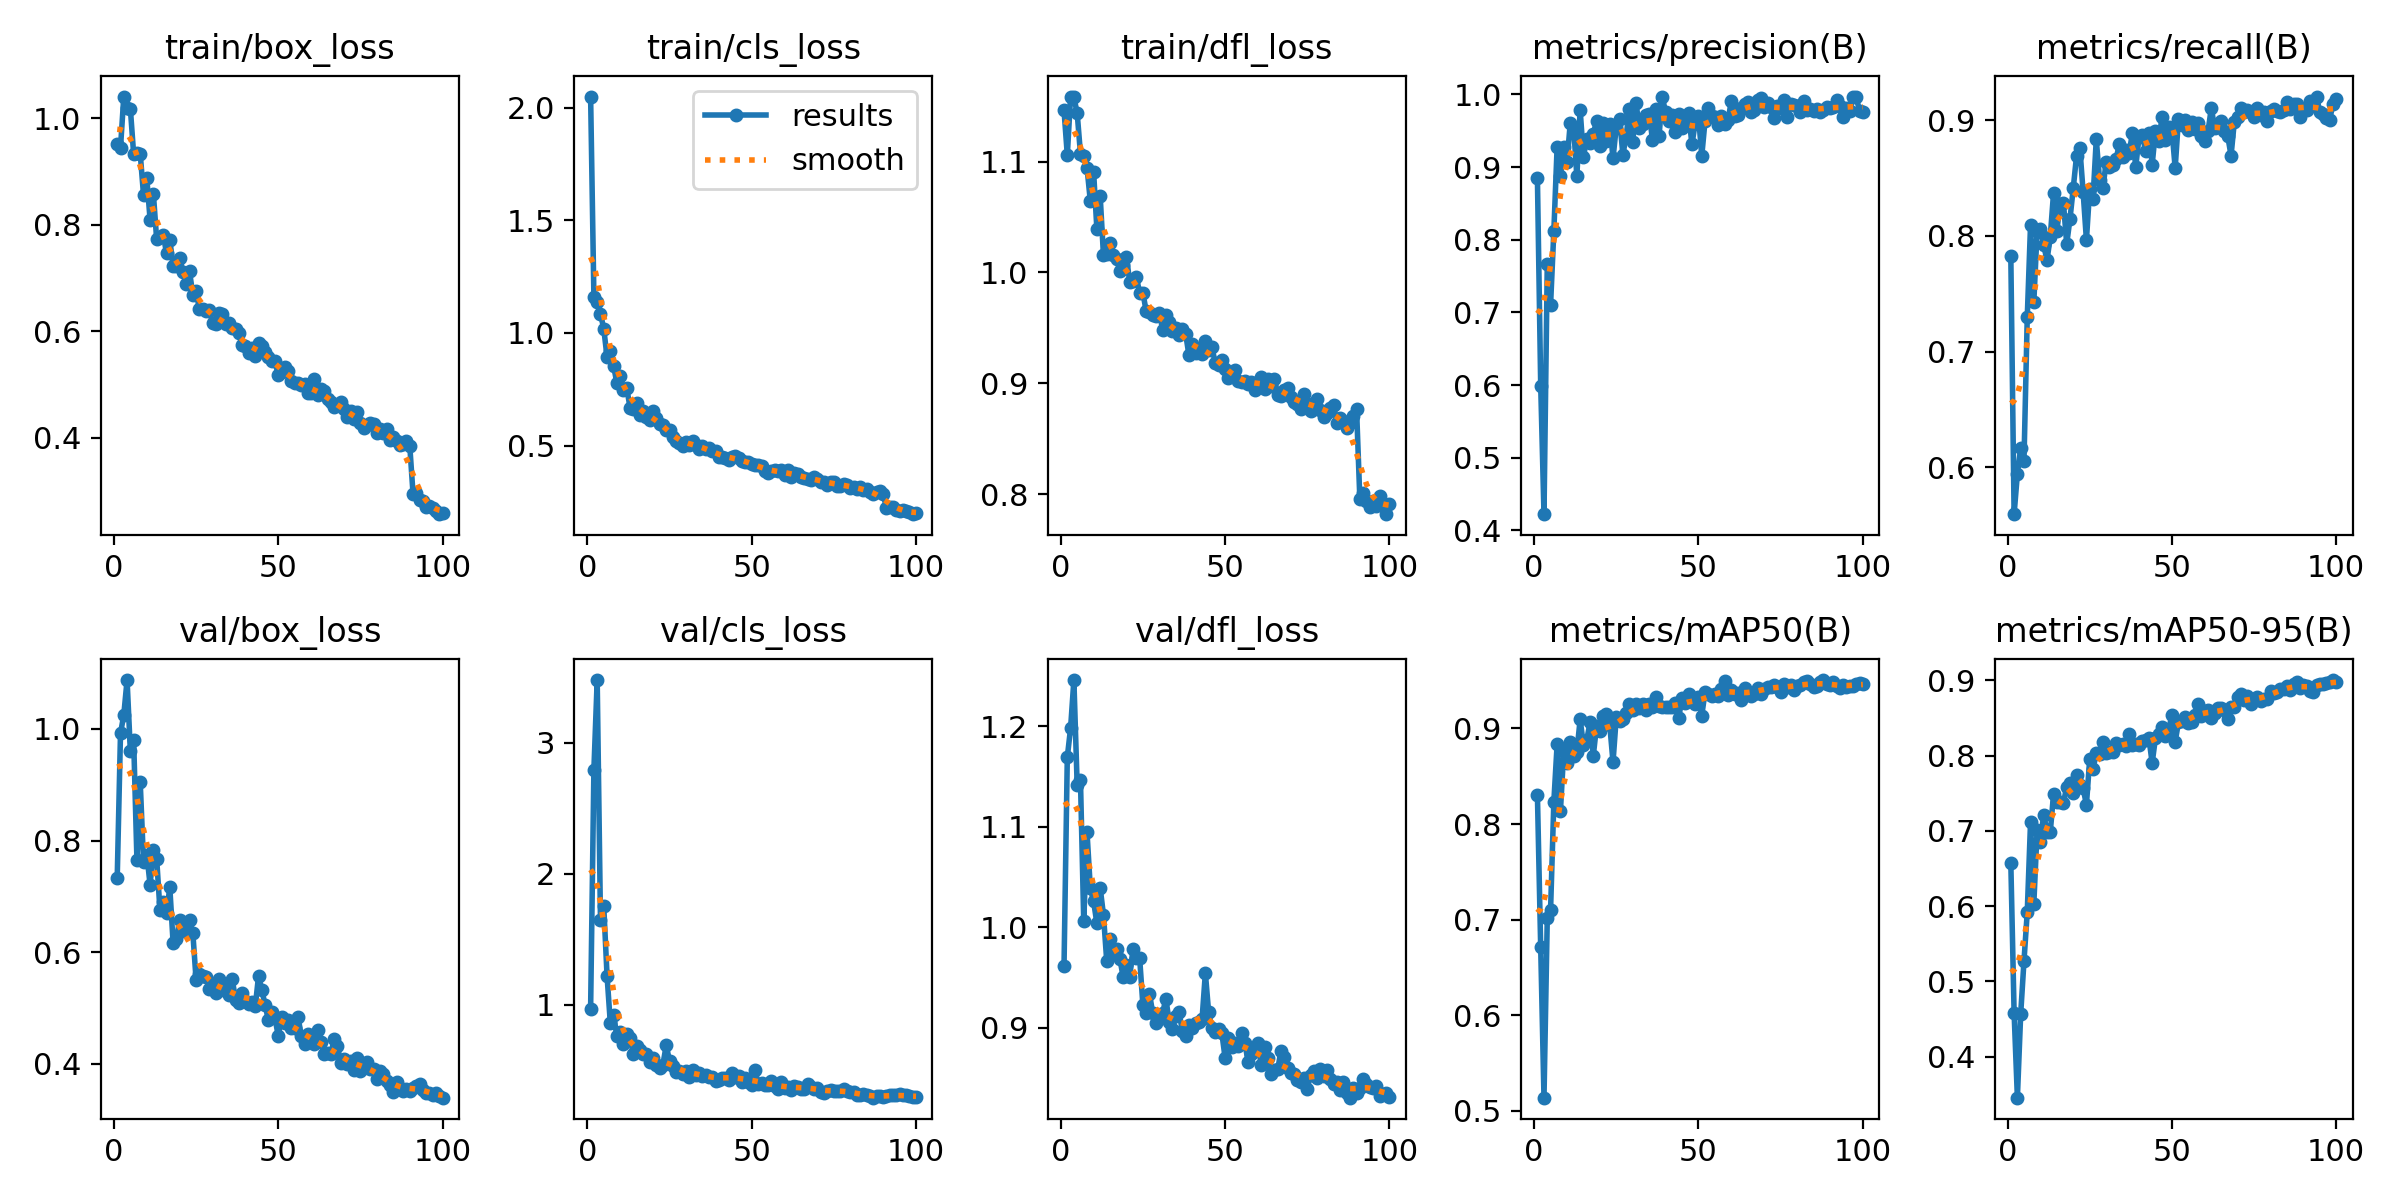


Validation Set Confusion Matrix:


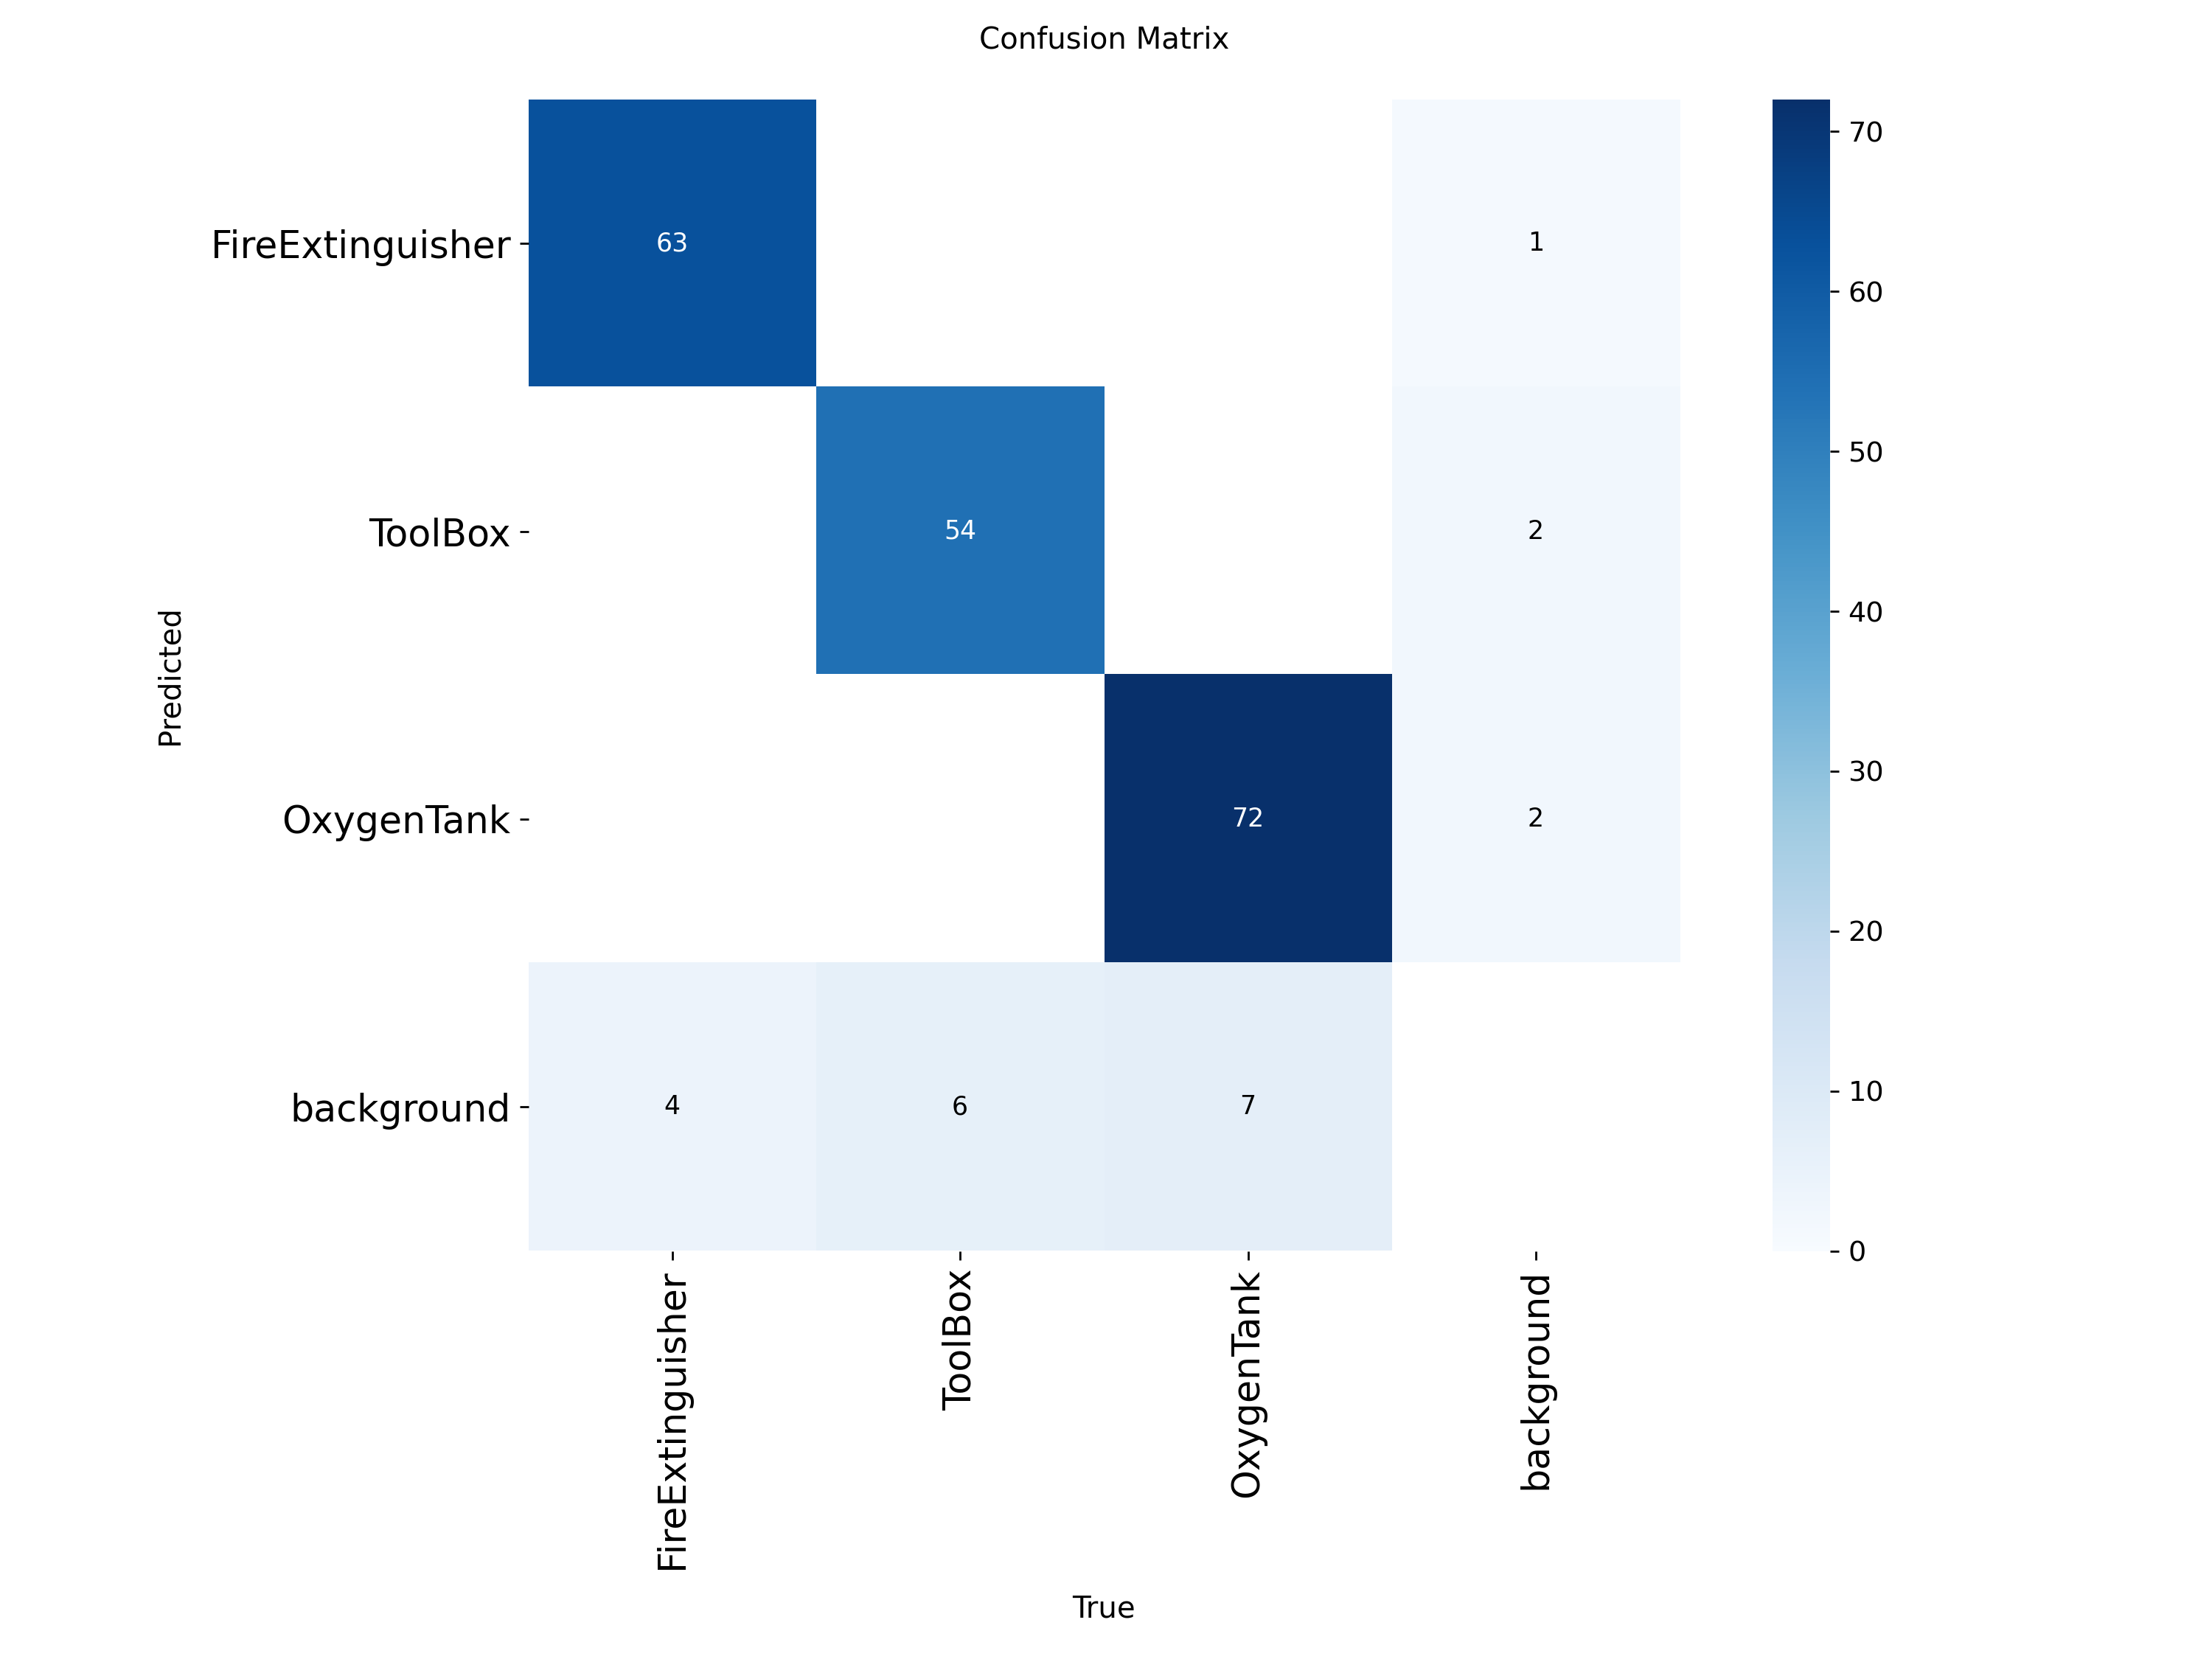

In [4]:
from IPython.display import Image, display

# Define the directory where the baseline results are saved
baseline_run_dir = 'detection_runs/baseline_run/'

# --- Display Training & Validation Curves ---
# This plot shows losses, helping to diagnose the training process.
print("Training and Validation Loss Curves:")
display(Image(filename=f'{baseline_run_dir}results.png', width=600))


# --- Display Validation Confusion Matrix ---
# This shows the performance on the validation set after training.
print("\nValidation Set Confusion Matrix:")
display(Image(filename=f'{baseline_run_dir}confusion_matrix.png', width=600))